#Chatbot for Grocery Store Assistance










[Program Flowchart](https://lucid.app/lucidchart/a2f325c3-171c-4127-9518-c4adde50dca5/edit?viewport_loc=-1704%2C-337%2C3003%2C2745%2C0_0&invitationId=inv_3558cafc-55b0-4552-bd92-8ff3c34e470f)

## Initiation

In [22]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [23]:

# Initiate Code: Read Data, Create Dataframe, Create "Global" Variables for storing data across chatbot functions
df = pd.read_csv('/content/grocery_data.csv')   #load grocery_data.csv and copy YOUR PATH
# df.head(10)


In [24]:
# Define the print_shopping_list function
def print_shopping_list(user_id):
    shopping_list = users_data.get(user_id, []) # Retrieve shopping list for the user

    if shopping_list:
        print("\nYour Shopping List:")
        for item in shopping_list:
            print(f"- {item}")
    else:
        print("\nYour Shopping List is empty.")


# GLOBAL VARIABLES AND DATA
# Initialize the users_data dictionary and other variables
users_data = {}
user_name = str()
user_id = hash(user_name)  # Generating an anonymous user ID

# GLOBAL FUNCTIONS
# Define the cart path_function to display a users shopping list and their respective aisle locations
def cart_path(user_id):
    if user_id in users_data:
        user_cart = users_data[user_id]
        cart_path = sorted(user_cart, key=lambda x: df[df['Product'] == x].iloc[0]['Product Location'])
        print("Optimized Shopping Path:")
        for item in cart_path:
            aisle = df[df['Product'] == item].iloc[0]['Product Location']
            print(f"{item} - Aisle {aisle}")
    else:
        print("No items in the shopping list currently.")

# Define the exit_function to display information at the end of the interaction
def exit_function(user_name, user_id):
    total_price = 0
    total_discounts = 0
    shopping_list = users_data.get(user_id, [])  # Get the shopping list for the user

    for item in shopping_list:
        price = df[df['Product'] == item]['Product Price'].values[0]
        discount = price * df[df['Product'] == item]['Product Discount'].values[0] / 100

        total_price += price - discount
        total_discounts += discount

    # Display farewell message and relevant information
    print(f"\nGoodbye, {user_name}! Thank you for choosing Provigo—see you next time!")

    if shopping_list:
        print("\nHere's a few things I've put together from our chat:\n")
        print(f"{user_name}'s shopping list and product locations:\n")
        # print_shopping_list(user_id)  # Print the shopping list
        cart_path(user_id)
        print(f"\nTotal price after discounts: ${total_price:.2f}")
        print(f"Total savings potential: ${total_discounts:.2f}")
    else:
        print("\nThank you for using our service, {}!".format(user_name))
    return

#Define a dictionary for the ingredients needed to make recipes
recipes = {
    "Chicken and Carrot Delight": {
        "ingredients": ["Chicken", "Carrots", "Onions", "Garlic Powder", "Thyme"],
        "category": "No Dietary Restriction"
    },
    "Classic Tomato Basil Pasta": {
        "ingredients": ["Pasta", "Tomato Sauce", "Basil", "Black Pepper"],
        "category": "Vegetarian"
    },
    "Zesty Lemon Dill Salmon": {
        "ingredients": ["Salmon", "Lemon", "Dill", "Salt", "Black Pepper"],
        "category": "Pescatarian"
    },
    "Savory Beef Stir-Fry": {
        "ingredients": ["Beef", "Onions", "Bell Peppers", "Garlic Powder", "Cumin"],
        "category": "No Dietary Restriction"
    },
    "Strawberry Spinach Salad": {
        "ingredients": ["Spinach", "Strawberries", "Almonds", "Feta Cheese", "Balsamic Vinegar"],
        "category": "Vegetarian"
    },
    "Black Bean Chili": {
        "ingredients": ["Black Beans", "Chili Powder", "Cumin", "Tomatoes"],
        "category": "Vegan"
    },
    "Cheesy Spinach Omelette": {
        "ingredients": ["Eggs", "Milk", "Cheese", "Spinach", "Tomato"],
        "category": "Vegetarian"
    },
    "BBQ Chicken Skewers": {
        "ingredients": ["Chicken", "BBQ Sauce", "Onions", "Garlic Powder", "Paprika"],
        "category": "No Dietary Restriction"
    },
    "Tuna Salad Bowl": {
        "ingredients": ["Tuna", "Lettuce", "Tomatoes", "Cucumbers", "Red Onion"],
        "category": "Pescatarian"
    },
    "Minty Lamb Kebabs": {
        "ingredients": ["Lamb", "Mint", "Yogurt", "Cucumber", "Garlic Powder"],
        "category": "No Dietary Restriction"
    },
    "Apple Cinnamon Pork Chops": {
        "ingredients": ["Pork", "Apples", "Cinnamon", "Brown Sugar", "Salt"],
        "category": "No Dietary Restriction"
    },
    "Stir-Fried Green Beans": {
        "ingredients": ["Green Beans", "Soy Sauce", "Garlic Powder", "Ginger"],
        "category": "Vegan"
    },
    "Honey Ginger Glazed Chicken": {
        "ingredients": ["Chicken", "Broccoli", "Soy Sauce", "Ginger", "Honey"],
        "category": "No Dietary Restriction"
    },
    "Lemon Dill Baked Salmon": {
        "ingredients": ["Salmon", "Asparagus", "Lemon", "Dill", "Olive Oil"],
        "category": "Pescatarian"
    },
    "Black Bean and Corn Salad": {
        "ingredients": ["Black Beans", "Corn", "Tomatoes", "Red Onion", "Cilantro"],
        "category": "Vegan"
    },
    "Breakfast Bacon and Cheese Scramble": {
        "ingredients": ["Eggs", "Bacon", "Cheese", "Tomatoes", "Green Onion"],
        "category": "No Dietary Restriction"
    },
    "Tuna Olive Pasta": {
        "ingredients": ["Tuna", "Pasta", "Olives", "Tomatoes", "Red Onion"],
        "category": "Pescatarian"
    },
    "Coconut Curry Chicken": {
        "ingredients": ["Chicken", "Cauliflower", "Curry Powder", "Coconut Milk", "Ginger"],
        "category": "No Dietary Restriction"
    },
    "Savory Beef Burger": {
        "ingredients": ["Ground Beef", "Onions", "Black Pepper", "Ketchup", "Mustard"],
        "category": "No Dietary Restriction"
    },
    "Thanksgiving Turkey Feast": {
        "ingredients": ["Turkey", "Cranberry Sauce", "Stuffing", "Gravy", "Mashed Potatoes"],
        "category": "No Dietary Restriction"
    }
}

#Define a dictionary for the ingredients needed to make recipes
recipes = {
    "Chicken and Carrot Delight": {
        "ingredients": ["Chicken", "Carrots", "Onions", "Garlic Powder", "Thyme"],
        "category": "No Dietary Restriction"
    },
    "Classic Tomato Basil Pasta": {
        "ingredients": ["Pasta", "Tomato Sauce", "Basil", "Black Pepper"],
        "category": "Vegetarian"
    },
    "Zesty Lemon Dill Salmon": {
        "ingredients": ["Salmon", "Lemon", "Dill", "Salt", "Black Pepper"],
        "category": "Pescatarian"
    },
    "Savory Beef Stir-Fry": {
        "ingredients": ["Beef", "Onions", "Bell Peppers", "Garlic Powder", "Cumin"],
        "category": "No Dietary Restriction"
    },
    "Strawberry Spinach Salad": {
        "ingredients": ["Spinach", "Strawberries", "Almonds", "Feta Cheese", "Balsamic Vinegar"],
        "category": "Vegetarian"
    },
    "Black Bean Chili": {
        "ingredients": ["Black Beans", "Chili Powder", "Cumin", "Tomatoes"],
        "category": "Vegan"
    },
    "Cheesy Spinach Omelette": {
        "ingredients": ["Eggs", "Milk", "Cheese", "Spinach", "Tomato"],
        "category": "Vegetarian"
    },
    "BBQ Chicken Skewers": {
        "ingredients": ["Chicken", "BBQ Sauce", "Onions", "Garlic Powder", "Paprika"],
        "category": "No Dietary Restriction"
    },
    "Tuna Salad Bowl": {
        "ingredients": ["Tuna", "Lettuce", "Tomatoes", "Cucumbers", "Red Onion"],
        "category": "Pescatarian"
    },
    "Minty Lamb Kebabs": {
        "ingredients": ["Lamb", "Mint", "Yogurt", "Cucumber", "Garlic Powder"],
        "category": "No Dietary Restriction"
    },
    "Apple Cinnamon Pork Chops": {
        "ingredients": ["Pork", "Apples", "Cinnamon", "Brown Sugar", "Salt"],
        "category": "No Dietary Restriction"
    },
    "Stir-Fried Green Beans": {
        "ingredients": ["Green Beans", "Soy Sauce", "Garlic Powder", "Ginger"],
        "category": "Vegan"
    },
    "Honey Ginger Glazed Chicken": {
        "ingredients": ["Chicken", "Broccoli", "Soy Sauce", "Ginger", "Honey"],
        "category": "No Dietary Restriction"
    },
    "Lemon Dill Baked Salmon": {
        "ingredients": ["Salmon", "Asparagus", "Lemon", "Dill", "Olive Oil"],
        "category": "Pescatarian"
    },
    "Black Bean and Corn Salad": {
        "ingredients": ["Black Beans", "Corn", "Tomatoes", "Red Onion", "Cilantro"],
        "category": "Vegan"
    },
    "Breakfast Bacon and Cheese Scramble": {
        "ingredients": ["Eggs", "Bacon", "Cheese", "Tomatoes", "Green Onion"],
        "category": "No Dietary Restriction"
    },
    "Tuna Olive Pasta": {
        "ingredients": ["Tuna", "Pasta", "Olives", "Tomatoes", "Red Onion"],
        "category": "Pescatarian"
    },
    "Coconut Curry Chicken": {
        "ingredients": ["Chicken", "Cauliflower", "Curry Powder", "Coconut Milk", "Ginger"],
        "category": "No Dietary Restriction"
    },
    "Savory Beef Burger": {
        "ingredients": ["Ground Beef", "Onions", "Black Pepper", "Ketchup", "Mustard"],
        "category": "No Dietary Restriction"
    },
    "Thanksgiving Turkey Feast": {
        "ingredients": ["Turkey", "Cranberry Sauce", "Stuffing", "Gravy", "Mashed Potatoes"],
        "category": "No Dietary Restriction"
    }
}


# Create a dictionary to categorize recipes based on dietary restrictions
recipe_category = {
    "Vegan": [],
    "Vegetarian": [],
    "Pescatarian": [],
    "No Dietary Restrictions": []
}

# Populate the recipe_category dictionary based on recipe data
for recipe_name, recipe_data in recipes.items():
    category = recipe_data["category"]
    if category not in recipe_category:
        category = "No Dietary Restrictions"
    recipe_category[category].append(recipe_name)


boroughs = ['All'] + list(df['Store Borough'].unique())

# Function to allow the user to select a borough
def select_borough():
    # Display available boroughs including an 'All' option for global insights
    print("\nAvailable Store Boroughs:")
    for i, borough in enumerate(boroughs, 1):
        print(f"{i}. {borough}")

    # Get user's choice for a borough
    while True:
        borough_choice = input("\nPlease select a borough by entering its corresponding number: ").strip().lower()

        if borough_choice.isdigit() and 1 <= int(borough_choice) <= len(boroughs):
            updated_borough = boroughs[int(borough_choice)-1]
            return updated_borough
        else:
            print("Invalid choice. Please select a valid borough.")

## SCENARIO FUNCTIONS

### Product Discovery Sub Function


In [32]:
# Function to help the user find products and manage shopping list
def find_product(current_borough, user_name, user_id, shopping_list):
  while True:
    if current_borough == "All":
      print("I'm sorry, please select a specific grocery store so I can help you find the products you're looking for!")
      current_borough = select_borough()
    else:
      categories = df[df['Store Borough'] == current_borough]['Product Category'].unique()
      while True:
        # Display available product categories
          for i, cat in enumerate(categories):
            print(f"{i + 1}. {cat}")
          print(f"{len(categories) + 1}. Return to Main Menu")  # Adding Exit as an option

          try:
              category_choice = int(input("\nPlease select a product category number: "))
              if category_choice == len(categories) + 1:
                return
              chosen_category = categories[category_choice - 1]
          except (ValueError, IndexError):
              print("Invalid choice, please try again.")
              continue

          # Products
          while True:
              products = df[(df['Store Borough'] == current_borough) & (df['Product Category'] == chosen_category)]['Product'].unique()
              # Display available products in the chosen category
              for i, product in enumerate(products):
                print(f"{i + 1}. {product}")
              print(f"{len(products) + 1}. Return to Categories")  # Adding Exit as an option

              try:
                  product_choice = int(input("\nPlease select a product number: "))
                  if product_choice == len(products) + 1:
                      break
                  chosen_product = products[product_choice - 1]
                  if chosen_product not in users_data[user_id]:
                      users_data[user_id].append(chosen_product)

                  details_row = df[(df['Store Borough'] == current_borough) & (df['Product'] == chosen_product)].iloc[0]

                  # Print Product Details
                  discounted_price = details_row['Product Price'] * (1 - details_row['Product Discount'] / 100)
                  print(f"\nProduct Details for {chosen_product}:")
                  print(f" - Aisle: {details_row['Product Location']}")
                  print(f" - Quantity Available: {details_row['Quantity']}")
                  print(f" - Price: ${details_row['Product Price']:.2f}")
                  print(f" - Discount: {details_row['Product Discount']}%")
                  print(f" - Price After Discount: ${discounted_price:.2f}\n")

                  # Ask if they want to add it to their shopping list
                  add_to_list = input("Do you want to add {} to your shopping list?\n1.Yes\n2.No\n".format(chosen_product))
                  if add_to_list == '1':
                      if chosen_product not in shopping_list:
                          shopping_list.append(chosen_product)

                  else:
                      pass

                  # Next Steps
                  print("\nWhat would you like to do next?")
                  print("1. Keep shopping in this category")
                  print("2. Choose another category")
                  print("3. See shopping list options")
                  print("4. Exit")
                  next_action = input("Please select an option: ")

                  if next_action == '4':
                      return
                  elif next_action == '1':
                      continue
                  elif next_action == '2':
                      break
                  elif next_action == '3':

                      while True:  # inner loop for shopping list options
                          print("\nShopping List Options:")
                          print("1. Shopping List Summary")
                          print("2. Optimized Cart Path")
                          print("3. Return to shopping")
                          print("4. Exit")
                          option = input("Please select an option: ")

                          if option == '1':
                              total_price = sum([df[(df['Product'] == item)]['Product Price'].values[0] * (1 - df[(df['Product'] == item)]['Product Discount'].values[0] / 100) for item in shopping_list])
                              total_discounts = sum([df[(df['Product'] == item)]['Product Price'].values[0] * df[(df['Product'] == item)]['Product Discount'].values[0] / 100 for item in shopping_list])
                              print(f"\nShopping List Summary:")
                              print(f" - Number of items: {len(shopping_list)}")
                              print(f" - Total price after discounts: ${total_price:.2f}")
                              print(f" - Total saved: ${total_discounts:.2f}\n")
                          elif option == '2':
                              cart_path(user_id)  # I noticed you commented the actual logic here, so this function should be defined somewhere else or uncomment the logic you've provided.
                          elif option == '3' or option == '4':
                              break
                          else:
                              print("Invalid choice, please try again.")
                      if option == '3':
                          break
                  else:
                      print("Invalid choice, please try again.")
              except (ValueError, IndexError):
                  print("Invalid choice, please try again.")
  return current_borough, shopping_list


### Recipe Chatbot Sub Function


In [26]:
# Function to interact with the user for selecting recipes and managing shopping list
def recipe_chatbot(user_id, user_name, total_discounts, total_price, shopping_list, current_borough):
  print("Welcome to the Recipe Chatbot!")
  while True:
    if current_borough == "All":
      print("I'm sorry, please select a specific grocery store so I can help you find the recipes you're looking for!")
      current_borough = select_borough()
    else:

      while True:
          valid_dietary_choices = ["1", "2", "3", "4", "5"]
          category_choice = input("\nPlease select a dietary preference:\n1. Vegan\n2. Vegetarian\n3. Pescatarian\n4. No Dietary Restrictions\n5. Exit\n")

          if category_choice == "5":
              return
          if category_choice in valid_dietary_choices:
              chosen_category = {
                  "1": "Vegan",
                  "2": "Vegetarian",
                  "3": "Pescatarian",
                  "4": "No Dietary Restrictions"
              }[category_choice]

              recipes_to_display = recipe_category[chosen_category]
              print(f"Here are the recipes for '{chosen_category}':")

              # Display recipes for the chosen dietary category
              for idx, recipe in enumerate(recipes_to_display, start=1):
                  print(f"{idx}. {recipe}")

              while True:
                  view_ingredients = input("Do you want to see the ingredients for a recipe? Enter:\n1.Yes\n2.No\n ")
                  while view_ingredients not in ["1", "2"]:
                            print("Sorry, I didn't understand your choice. Please enter a valid option (1 or 2).")
                            view_ingredients = input("Do you want to see the ingredients for a recipe? Enter:\n1. Yes\n2. No\n")

                  if view_ingredients == "1":
                      # Display ingredients of the chosen recipe
                      recipe_number = input("\nPlease enter the recipe number you want to view: ")
                      if recipe_number.isdigit() and 0 <= int(recipe_number) - 1 < len(recipes_to_display):
                          chosen_recipe = recipes_to_display[int(recipe_number) - 1]
                          ingredients = recipes[chosen_recipe]["ingredients"]
                          print("Here are the ingredients:")
                          for ingredient in ingredients:
                              print(f"- {ingredient}")

                          check_availability = input("\nDo you want to check the availability of these ingredients? Enter:\n1.Yes\n2.No\n")
                          while check_availability not in ["1", "2"]:
                            print("Sorry, I didn't understand your choice. Please enter a valid option (1 or 2).")
                            check_availability = input("Do you want to check the availability of these ingredients? Enter:\n1. Yes\n2. No\n")

                          if check_availability == "1":
                              # Check availability of ingredients and display unavailable ones
                              unavailable_ingredients = []
                              for ingredient in ingredients:
                                  if ingredient not in df['Product'].unique():
                                      unavailable_ingredients.append(ingredient)

                              if unavailable_ingredients:
                                 print("\nThe following ingredients are not available at your preferred location:")
                              for ingredient in unavailable_ingredients:
                                      print(f"- {ingredient}")

                              else:
                                  recipe_choice = input("\nAll ingredients are available! Would you like to add them to your shopping list?\n1. Yes\n2. No\n(Please Select 1 or 2): ")
                                  while recipe_choice not in ["1", "2"]:
                                    print("Sorry, I didn't understand your choice. Please enter a valid option (1 or 2).")
                                    recipe_choice = input("All ingredients are available! Would you like to add them to your shopping list?s? Enter:\n1. Yes\n2. No\n")

                                  if recipe_choice == '1':
                                   # Add ingredients to the user's shopping list
                                   for ingredient in ingredients:
                                       if ingredient not in users_data[user_id]:
                                          users_data[user_id].append(ingredient)
                                   print(f"\nDone! Here's your shopping list so far:\n{users_data[user_id]}")

                  else:
                    break

                  # Prompt user if they want to view another recipe
                  repeat_choice = input("Do you want to view another recipe?\n1. Yes, with the same dietary preference as specified earlier\n2. Yes, with a different dietary preference than specified earlier\n3. No, return to Main Menu\n")
                  while repeat_choice not in ["1", "2", "3"]:
                    print("Sorry, I didn't understand your choice. Please enter a valid option (1, 2 or 3.")
                    repeat_choice = input("Do you want to view another recipe?\n1. Yes, with the same dietary preference as specified earlier\n2. Yes, with a different dietary preference than specified earlier\n3. No, return to Main Menu\n")
                  if repeat_choice == "1":
                      continue
                  elif repeat_choice == "2":
                      break
                  elif repeat_choice == "3":
                      print("Returning to Main Menu.")
                      return
                  else:
                      print("Sorry, I didn't get that. Please choose a valid option.")
          elif category_choice == "5":
             return
          else:
              print("Sorry, I didn't get that. Please choose a valid option.")
    return shopping_list

### Analytics Sub Function

In [27]:

# Function to compare average prices across product categories
def compare_average_prices(borough_df, current_borough):
    plt.figure(figsize=(12, 7))
    sns.barplot(x=borough_df['Product Category'], y=borough_df['Product Price'], estimator=np.mean)
    plt.title(f'Comparison of Average Prices Across Product Categories in {current_borough}')
    plt.xlabel('Product Category')
    plt.ylabel('Average Price/lbs')
    plt.xticks(rotation=45)
    plt.show()

# Function to find the product with the highest discount in a specific category
def highest_discount_in_category(borough_df, category):
    max_discount = borough_df[borough_df['Product Category'].str.lower() == category]['Product Discount'].max()
    product_with_max_discount = borough_df[(borough_df['Product Category'].str.lower() == category) & (borough_df['Product Discount'] == max_discount)]['Product'].iloc[0]
    print(f"The highest discount in the {category} category is {max_discount}%. It's for the product: {product_with_max_discount}.")

# Function to display average discounts across product categories
def average_discount_by_category(borough_df, current_borough):
    plt.figure(figsize=(12, 7))
    sns.barplot(x=borough_df['Product Category'], y=borough_df['Product Discount'], estimator=np.mean)
    plt.title(f'Average Discounts Across Product Categories in {current_borough}')
    plt.xlabel('Product Category')
    plt.ylabel('Average Discount (%)')
    plt.xticks(rotation=45)
    plt.show()

    choice = input("Would you like to know the highest discount in a specific category? (yes/no) ").strip().lower()
    if choice == 'yes':
        category = input("Please specify the product category: ").strip().lower()
        highest_discount_in_category(borough_df, category)

# Function to display the distribution of product prices
def show_price_distribution(borough_df, current_borough):
    plt.figure(figsize=(10, 6))
    sns.histplot(borough_df['Product Price'], bins=20, kde=True)
    plt.title(f'Distribution of Product Prices in {current_borough}')
    plt.xlabel('Price in CAD')
    plt.ylabel('Number of Products')
    plt.show()

# Main function for Analytics
def Analytics(current_borough):
    # Filter data based on selected borough
    borough_df = df if current_borough == 'All' else df[df['Store Borough'].str.lower() == current_borough.lower()]

    print(f"\nWelcome to the {current_borough} Provigo Chatbot!")
    while True:
        print("\nOptions:")
        print("1. View distribution of product prices.")
        print("2. Compare average prices across product categories.")
        print("3. View average discount across product categories.")
        print("4. Exit.")

        choice = input("\nPlease select an option (1-4): ").strip().lower()

        if choice == '1':
            show_price_distribution(borough_df, current_borough)
        elif choice == '2':
            compare_average_prices(borough_df, current_borough)
        elif choice == '3':
            average_discount_by_category(borough_df, current_borough)
        elif choice == '4':
            break
        else:
            print("Invalid choice. Please select a valid option.")


### Promotions Discovery Sub Function

In [28]:
# Function to display discounts based on user's selection - category or amount
def view_discounts_by(store_df, mode):
    """Shows discounts based on user's selection - category or amount."""

    if mode == "category":
      # Display discounts by category
        categories = store_df['Product Category'].unique().tolist()
        for cat in categories:
            print(f"\nCategory: {cat}")
            discounts_in_category = store_df[store_df['Product Category'] == cat]
            for _, row in discounts_in_category.iterrows():
                if row['Product Discount'] > 0:
                    print(f"- {row['Product']} - Discount: {row['Product Discount']}%")

        # Ask if the user wants to see discounts sorted by percentages
        choice = input("\nWould you like to see these discounts sorted by percentages? (yes/no): ").strip().lower()
        if choice == 'yes':
            sorted_df = store_df.sort_values(by='Product Discount', ascending=False)
            for _, row in sorted_df.iterrows():
                if row['Product Discount'] > 0:
                    print(f"- {row['Product']} ({row['Product Category']}) - Discount: {row['Product Discount']}%")

    elif mode == "amount":
      # Display discounts by discount amount
        sorted_df = store_df.sort_values(by='Product Discount', ascending=False)
        for _, row in sorted_df.iterrows():
            if row['Product Discount'] > 0:
                print(f"- {row['Product']} ({row['Product Category']}) - Discount: {row['Product Discount']}%")

        # Ask if the user wants to see discounts by category
        choice = input("\nWould you like to see these discounts by category? (yes/no): ").strip().lower()
        if choice == 'yes':
            view_discounts_by(store_df, "category")

# Function to find and display discount details for a specific product
def find_specific_product_discount(store_df, product_name):
    """Find and display discount details for a specific product."""

    matching_products = store_df[store_df['Product'].str.contains(product_name, case=False)]

    if matching_products.empty:
        print(f"No product found matching the name: {product_name} in {current_borough}.")
    else:
        for _, row in matching_products.iterrows():
            print(f"Product: {row['Product']}")
            print(f"Category: {row['Product Category']}")
            print(f"Original Price: ${row['Product Price']:.2f}")
            discounted_price = row['Product Price'] * (1 - row['Product Discount'] / 100)
            print(f"Discounted Price: ${discounted_price:.2f}")
            print(f"Discount: {row['Product Discount']}%")
            print("---------")

# Function to find and display products with discounts above a given threshold
def find_products_above_threshold(store_df, threshold):
    """Find and display products with discounts above the given threshold."""

    discounted_products = store_df[store_df['Product Discount'] >= threshold]

    if discounted_products.empty:
        print(f"No products found with discounts greater than or equal to {threshold}% in {current_borough}.")
    else:
        for _, row in discounted_products.iterrows():
            print(f"Product: {row['Product']}")
            print(f"Category: {row['Product Category']}")
            print(f"Original Price: ${row['Product Price']:.2f}")
            discounted_price = row['Product Price'] * (1 - row['Product Discount'] / 100)
            print(f"Discounted Price: ${discounted_price:.2f}")
            print(f"Discount: {row['Product Discount']}%")
            print("---------")

# Main function for Special Offers bot
def special_offers_bot(current_borough):

    # Fetch data for the selected borough
    store_df = df if current_borough == 'All' else df[df['Store Borough'] == current_borough]

    print(f"\nWelcome to the Special Offers for {current_borough}!")

    while True:
        print("\nHow would you like to see the discounts?")
        print("1. By Category")
        print("2. By Discount Amount")
        print("3. Search for a specific product's discount")
        print("4. Discounts greater than a certain percentage")
        print("5. Go back to main menu")

        mode_choice = input("Please enter your choice (1-5): ").strip().lower()

        if mode_choice == '1':
            view_discounts_by(store_df, "category")
        elif mode_choice == '2':
            view_discounts_by(store_df, "amount")
        elif mode_choice == '3':
            product_name = input("Enter the name of the product you're looking for: ").strip()
            find_specific_product_discount(store_df, product_name)
        elif mode_choice == '4':
            while True:
                try:
                    threshold = float(input("Enter the minimum discount percentage you're interested in (e.g. 20 for 20%): "))
                    break
                except ValueError:
                    print("Invalid input. Please enter a number.")
            find_products_above_threshold(store_df, threshold)
        elif mode_choice == '5':
            print(f"Returning to main menu from {current_borough} offers...")
            break
        else:
            print("Invalid choice. Please select a valid option.")


## MAIN CHATBOT

Please enter your name: Analytics
Welcome to your Main Menu Analytics!

Available Store Boroughs:
1. All
2. Mile End
3. Le Plateau
4. Outremont
5. Ville-Marie
6. Verdun

Please select a borough by entering its corresponding number: 1

Options:
1. Get recipe suggestions.
2. View product insights by borough.
3. View special offers by store.
4. Get detailed product info.
5. Exit.

Please select an option (1-5): 2

Welcome to the All Provigo Chatbot!

Options:
1. View distribution of product prices.
2. Compare average prices across product categories.
3. View average discount across product categories.
4. Exit.

Please select an option (1-4): 3


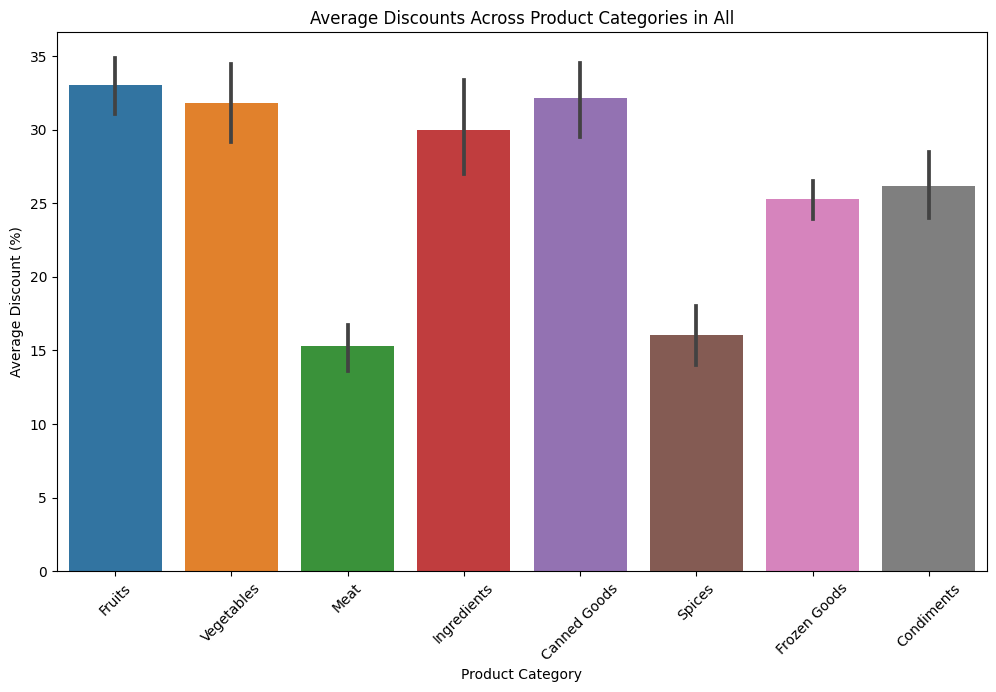

Would you like to know the highest discount in a specific category? (yes/no) no

Options:
1. View distribution of product prices.
2. Compare average prices across product categories.
3. View average discount across product categories.
4. Exit.

Please select an option (1-4): 4

Options:
1. Get recipe suggestions.
2. View product insights by borough.
3. View special offers by store.
4. Get detailed product info.
5. Exit.

Please select an option (1-5): 3

Welcome to the Special Offers for All!

How would you like to see the discounts?
1. By Category
2. By Discount Amount
3. Search for a specific product's discount
4. Discounts greater than a certain percentage
5. Go back to main menu
Please enter your choice (1-5): 2
- Eggs (Ingredients) - Discount: 55%
- Eggs (Ingredients) - Discount: 50%
- Apple (Fruits) - Discount: 45%
- Bananas (Fruits) - Discount: 45%
- Kiwi (Fruits) - Discount: 45%
- Lettuce (Vegetables) - Discount: 42%
- Ketchup (Condiments) - Discount: 42%
- Olives (Canned Goods

In [35]:
def main_chatbot():
  total_price = 0
  total_discounts = 0
  user_name = input("Please enter your name: ").capitalize()
  user_id = hash(user_name)  # Generating an anonymous user ID

  if user_id not in users_data:
    users_data[user_id] = []
    shopping_list = users_data[user_id]

  print(f"Welcome to your Main Menu {user_name}!")

  # Ask the user to select a store (borough) right at the beginning
  current_borough = select_borough()

  while True:
      print("\nOptions:")
      print("1. Get recipe suggestions.")
      print("2. View product insights by borough.")
      print("3. View special offers by store.")
      print("4. Get detailed product info.")
      print("5. Exit.")
      shopping_list = users_data[user_id]

      choice = input("\nPlease select an option (1-5): ").strip().lower()

      if choice == '1':
          current_borough = recipe_chatbot(user_id, user_name,total_discounts,total_price, shopping_list, current_borough)
      elif choice == '2':
          Analytics(current_borough)  # Passing the current borough to Analytics
      elif choice == '3':
          special_offers_bot(current_borough)  # Passing the current borough to special_offers_bot, Note: current_borough cannot be 'All' at this time
      elif choice == '4':
          current_borough = find_product(current_borough,user_name, user_id, shopping_list)  # Assuming find_product doesn't need the current borough. Note: current_borough cannot be 'All' at this time
      elif choice == '5':
          exit_function(user_name, user_id)
          break
      else:
          print("Invalid choice. Please select a valid option.")
  return

main_chatbot()


## Stored User Data

In [37]:
users_data

{-2522026661976734681: ['Chicken',
  'Carrots',
  'Onions',
  'Garlic Powder',
  'Thyme',
  'Beef',
  'Bell Peppers',
  'Cumin'],
 7369936344134842274: ['Chicken',
  'Carrots',
  'Onions',
  'Garlic Powder',
  'Thyme']}